### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [2]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
# Loading the dataset
df = pd.read_csv("ToyotaCorolla.csv", encoding='latin1')


In [127]:
data = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [128]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [129]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [131]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [132]:
data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [133]:
#Correlation Analysis

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


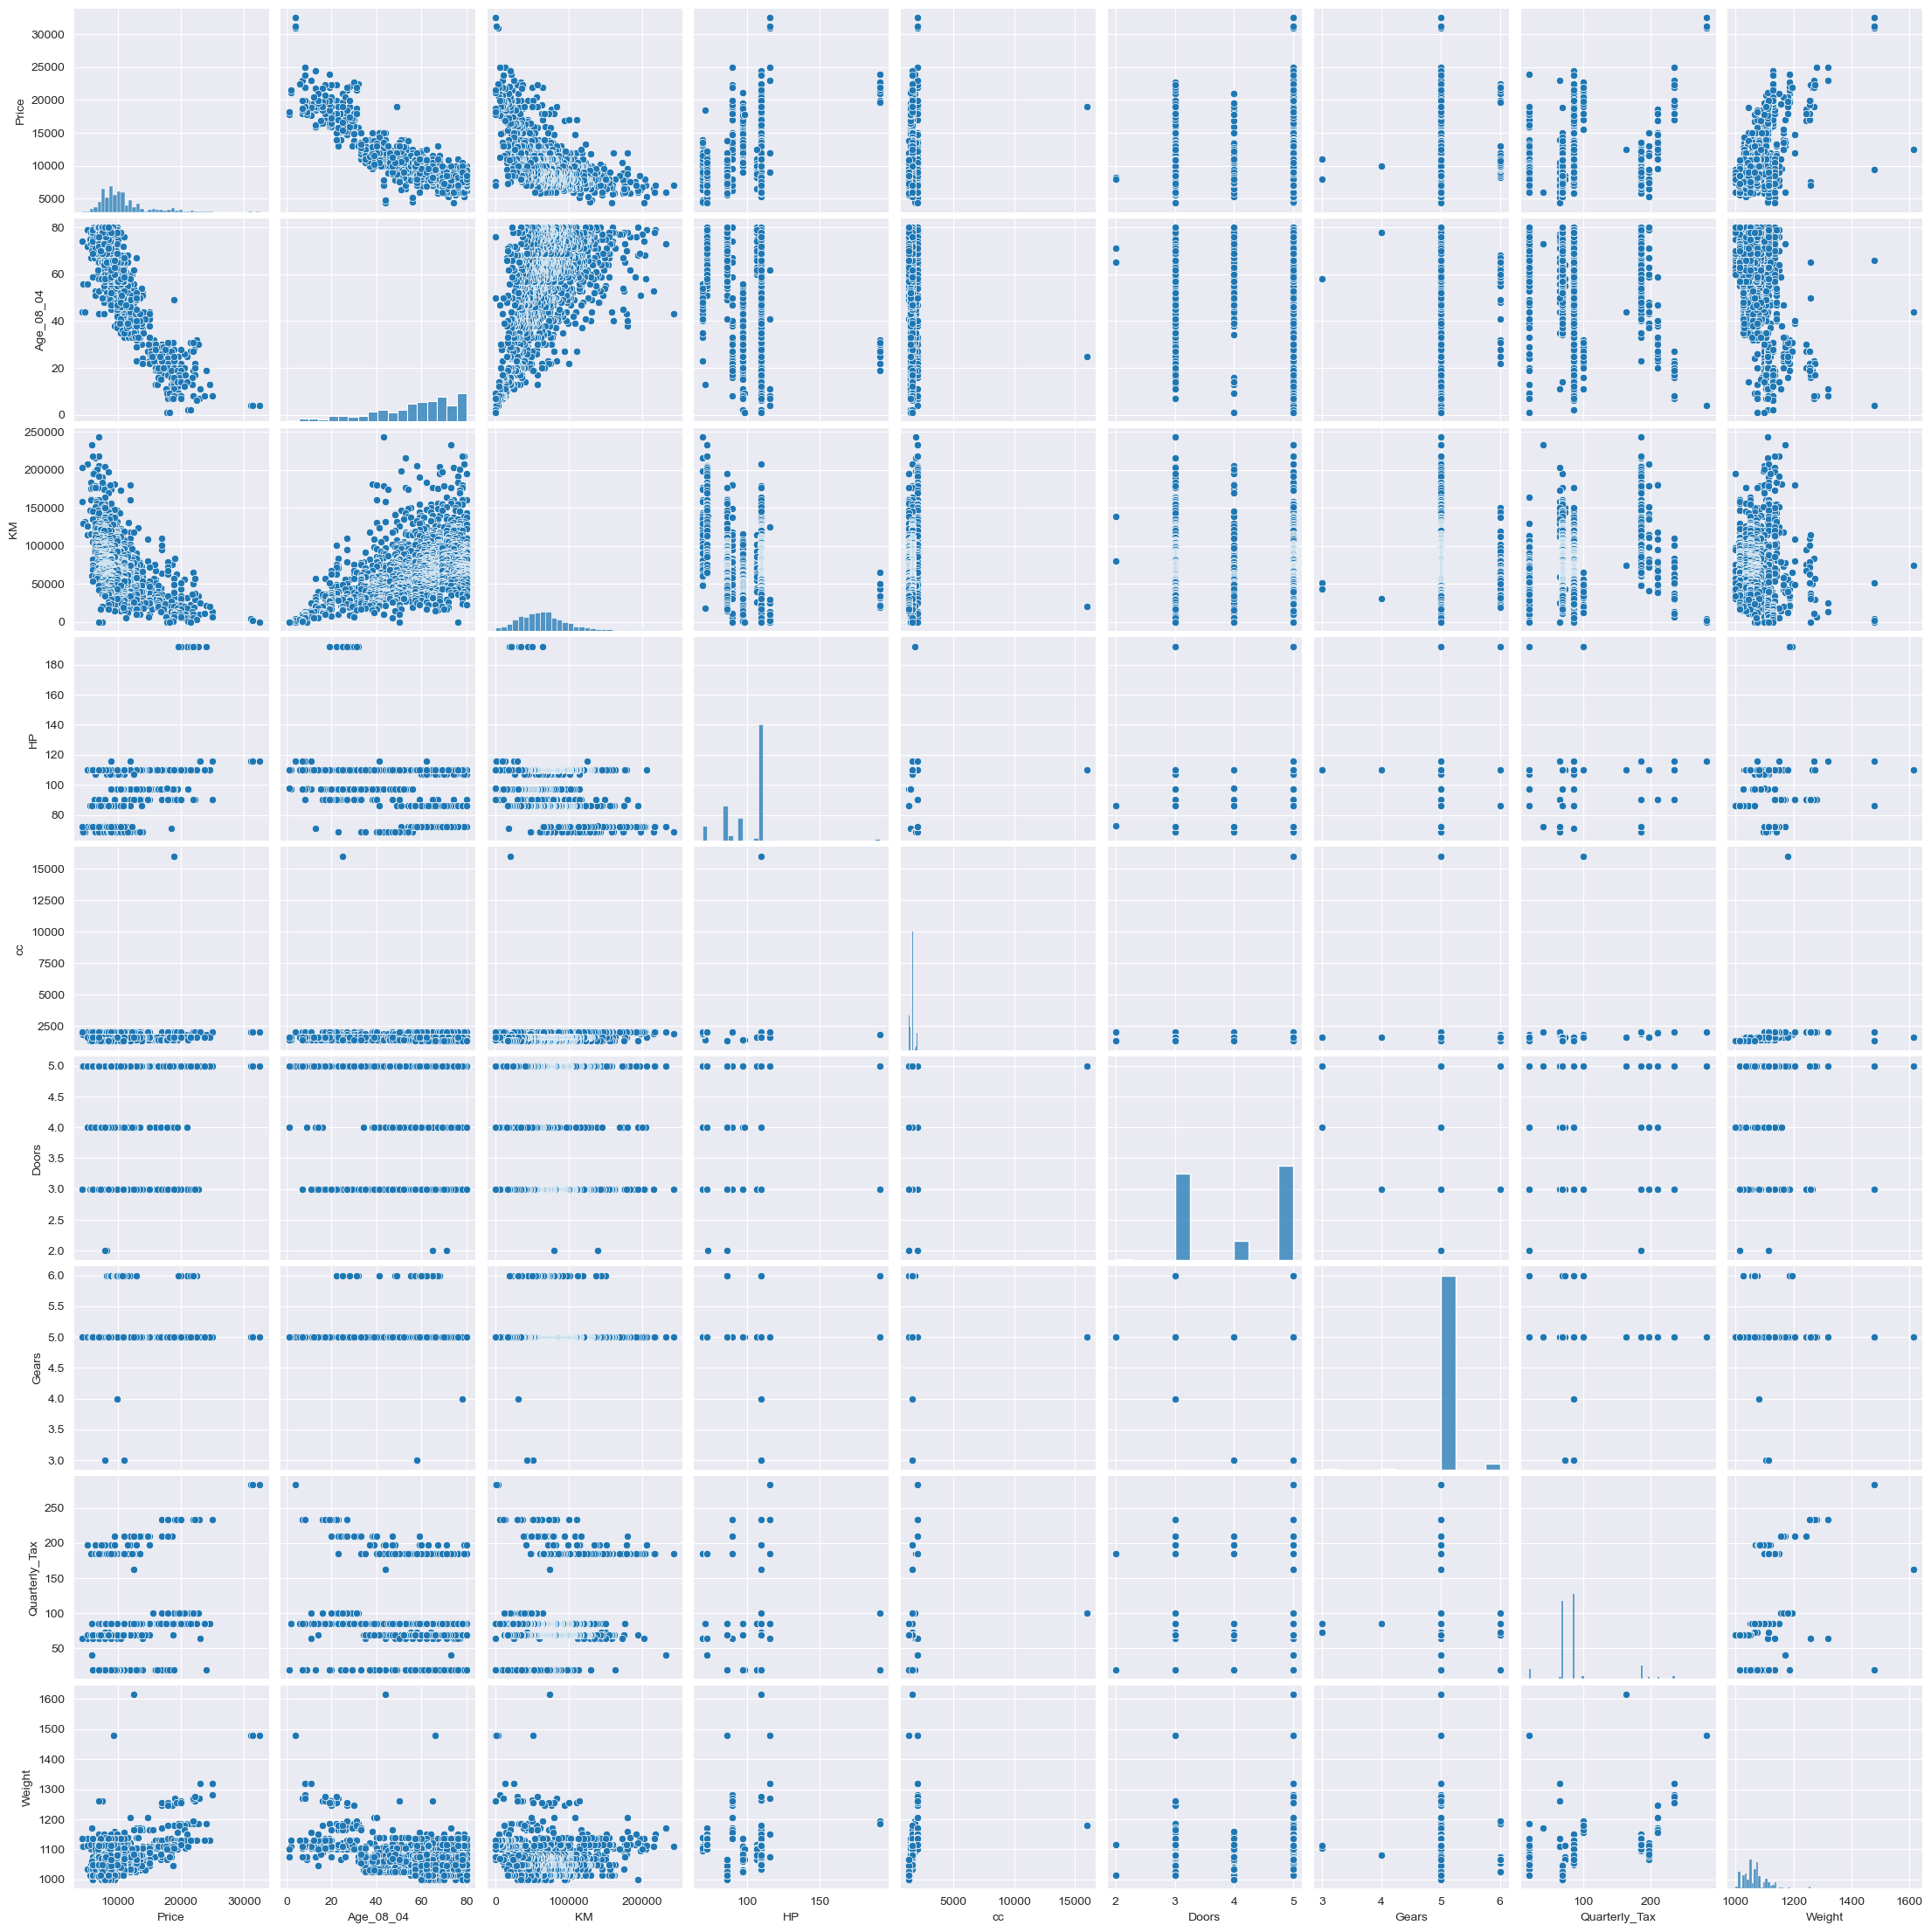

In [134]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [135]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [136]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()

In [137]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:21:06   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [139]:
 
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data).fit()

In [140]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:21:06   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
#Individually checking the models

In [142]:
model_Doors=smf.ols('Price~Age_08_04',data=data).fit()
model_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:21:06   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
model_km=smf.ols('Price~KM',data=data).fit()
model_km.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          1.76e-124
Time:                        00:21:06   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
model_km=smf.ols('Price~cc',data=data).fit()
model_km.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           1.55e-06
Time:                        00:21:06   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming 'data' is your DataFrame

rsq_Price = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=data).fit().rsquared  
vif_Price = 1/(1-rsq_Price) 

rsq_Age_08_04 = smf.ols('Age_08_04~Price+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data=data).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

rsq_KM = smf.ols('KM~Price+Age_08_04+HP+Doors+Gears+Quarterly_Tax+Weight', data=data).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Price+Age_08_04+KM+Doors+Gears+Quarterly_Tax+Weight', data=data).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_Doors = smf.ols('Doors~Price+Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight', data=data).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 

rsq_Gears = smf.ols('Gears~Price+Age_08_04+KM+HP+Doors+Quarterly_Tax+Weight', data=data).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Price+Age_08_04+KM+HP+Doors+Gears+Weight', data=data).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)  # Corrected line

rsq_Weight = smf.ols('Weight~Price+Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax', data=data).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 

# Storing vif values in a data frame
d1 = {'Variables':['Price','Age_08_04','KM','HP','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Price,vif_Age_08_04,vif_KM,vif_HP,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,Price,7.340136
1,Age_08_04,4.739806
2,KM,2.091582
3,HP,1.530054
4,Doors,1.156278
5,Gears,1.105568
6,Quarterly_Tax,2.290494
7,Weight,2.884888


In [146]:
predictions = model1.predict(data)
predictions
actual=data.Price

pred_actual = pd.DataFrame(predictions)
pred_actual['actual']=actual

pred_actual

,0,actual
0,16810.494470,13500
1,16270.230185,13750
2,16798.654675,13950
3,16424.410164,14950
4,16220.293832,13750
...,...,...
1431,8792.675166,7500
1432,8290.366994,10845
1433,8453.329229,8500
1434,8577.069163,7250


In [147]:
model1.resid.mean()

-1.9586209076765437e-09

In [148]:
model1.resid_pearson

array([-2.46683167, -1.87796225, -2.12268942, ...,  0.03477696,
       -0.98887229, -2.5732305 ])

<Axes: ylabel='Frequency'>

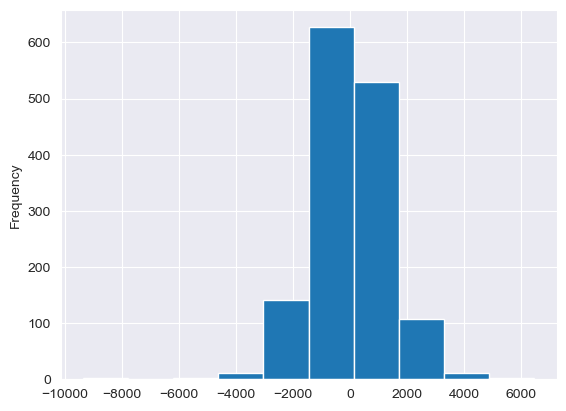

In [149]:
model1.resid.plot(kind='hist')

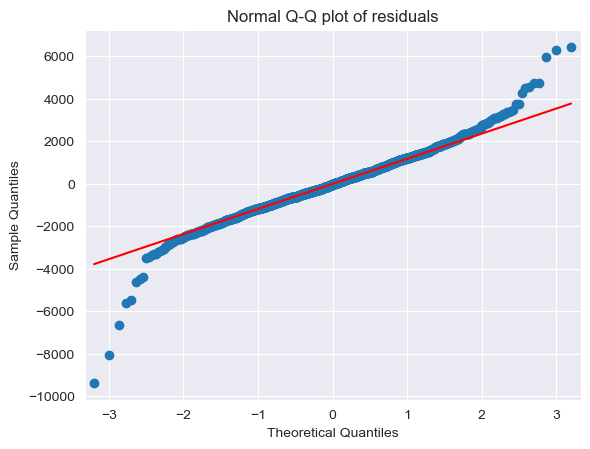

In [150]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [151]:
list(np.where(model1.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [152]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

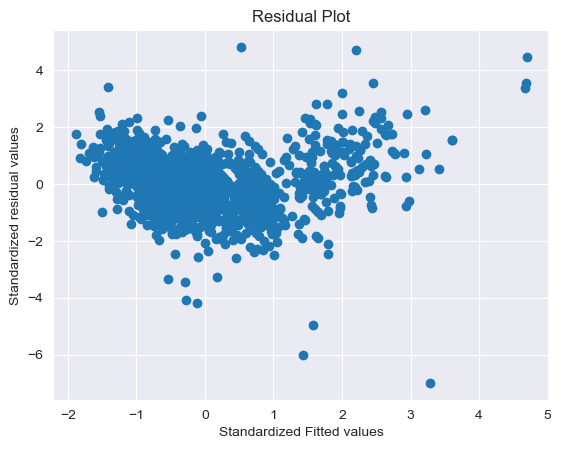

In [153]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

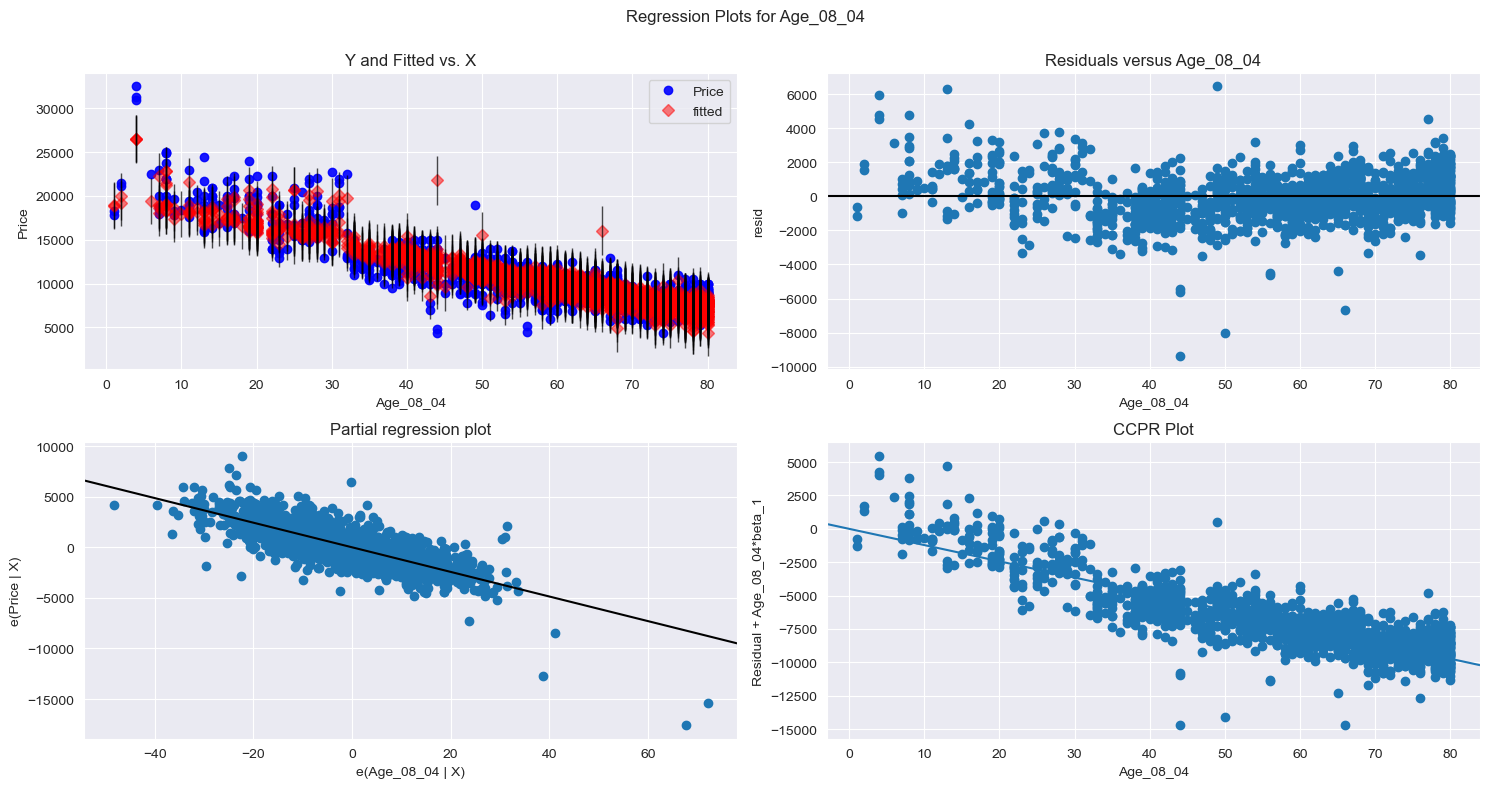

In [154]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age_08_04", fig=fig)
plt.show()

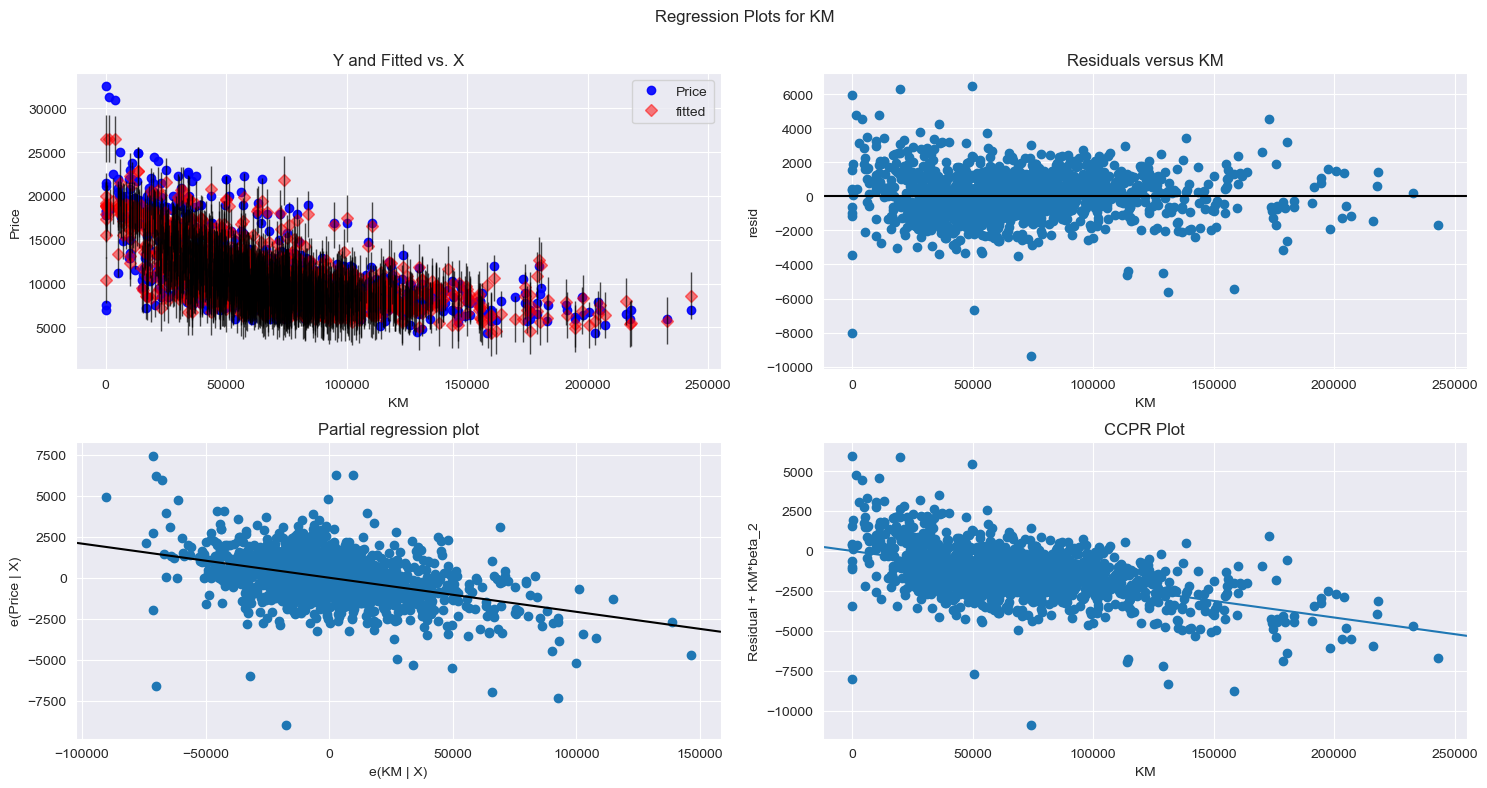

In [155]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "KM", fig=fig)
plt.show()

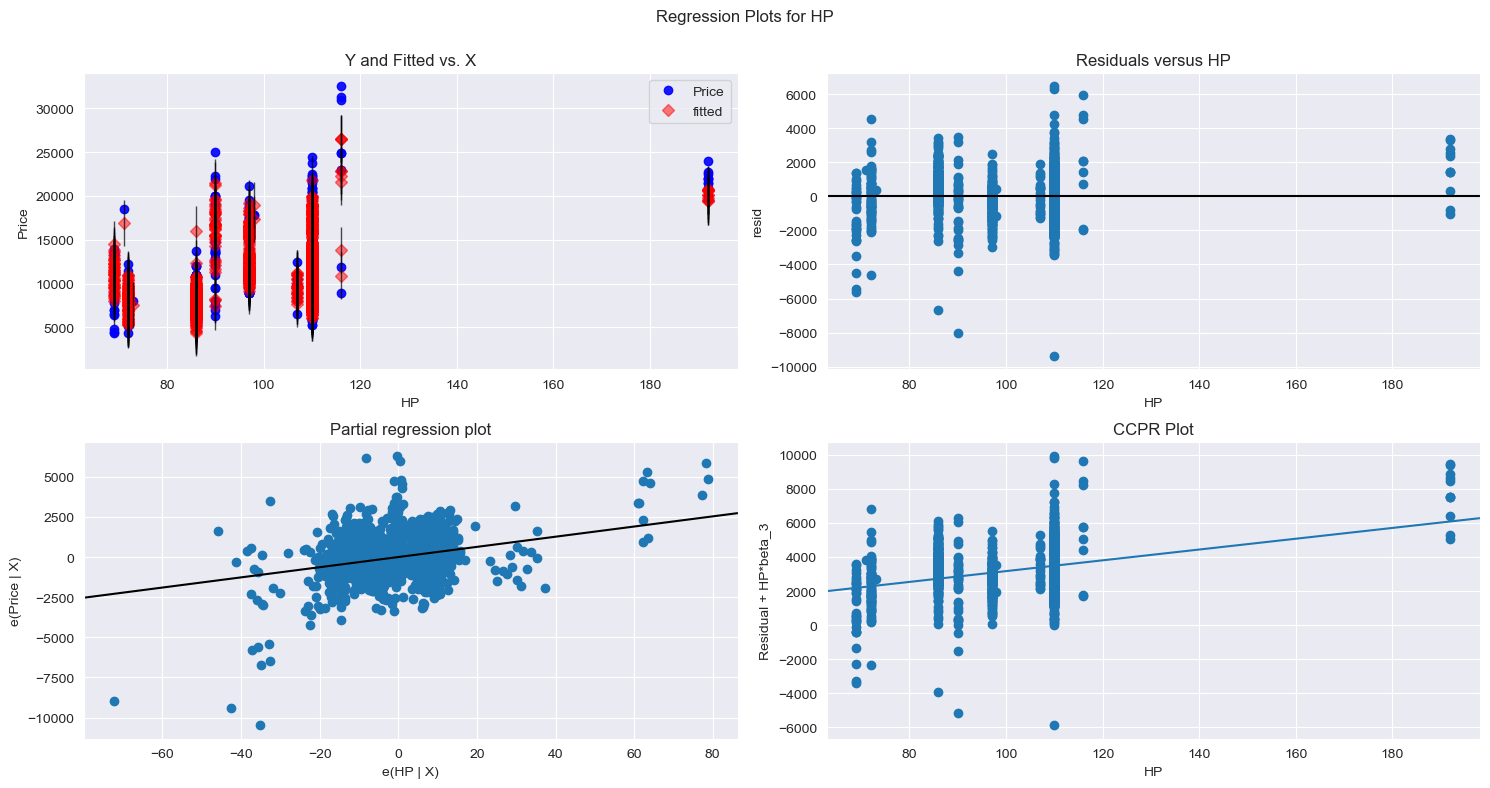

In [156]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "HP", fig=fig)
plt.show()

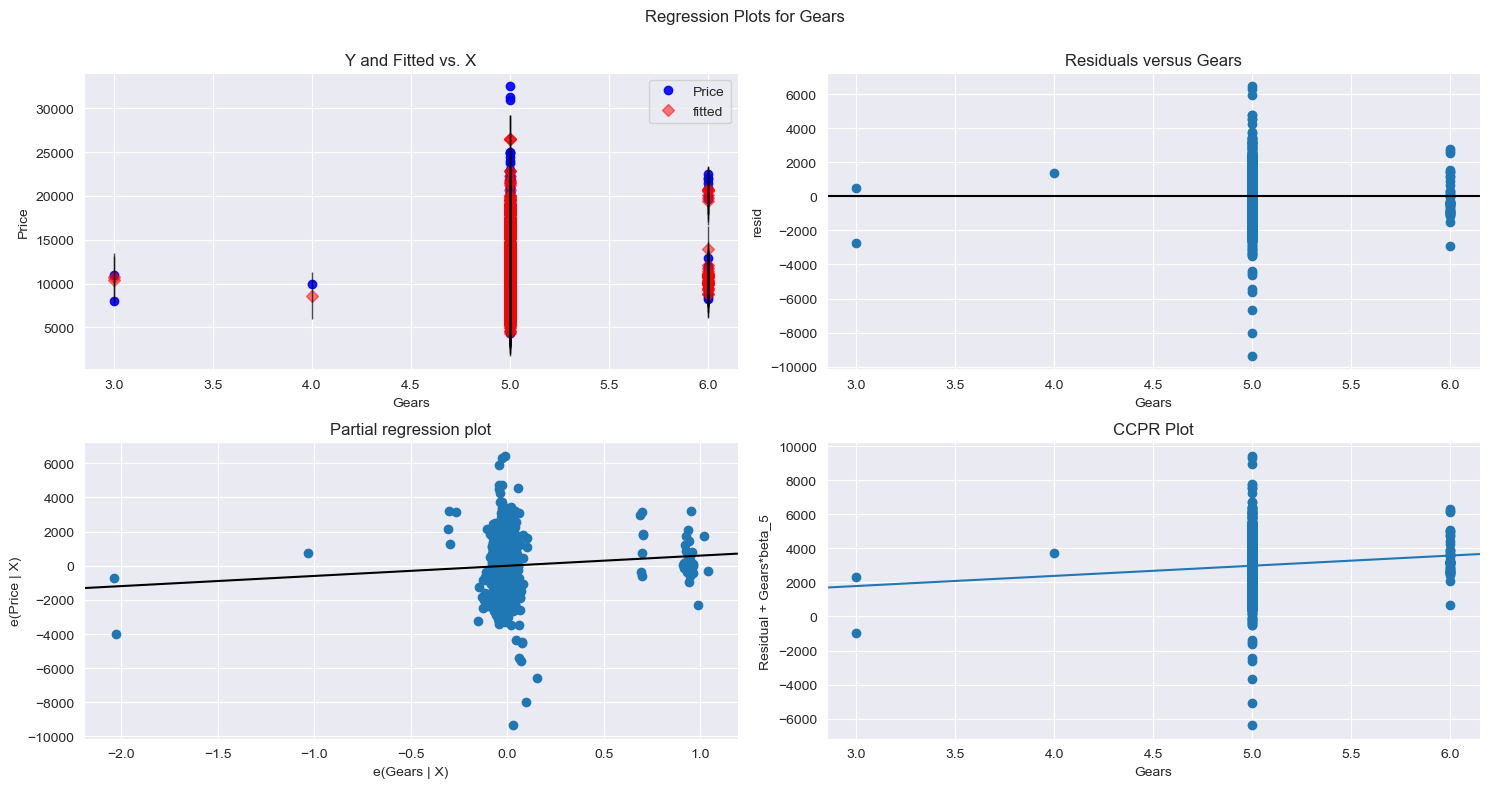

In [157]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Gears", fig=fig)
plt.show()

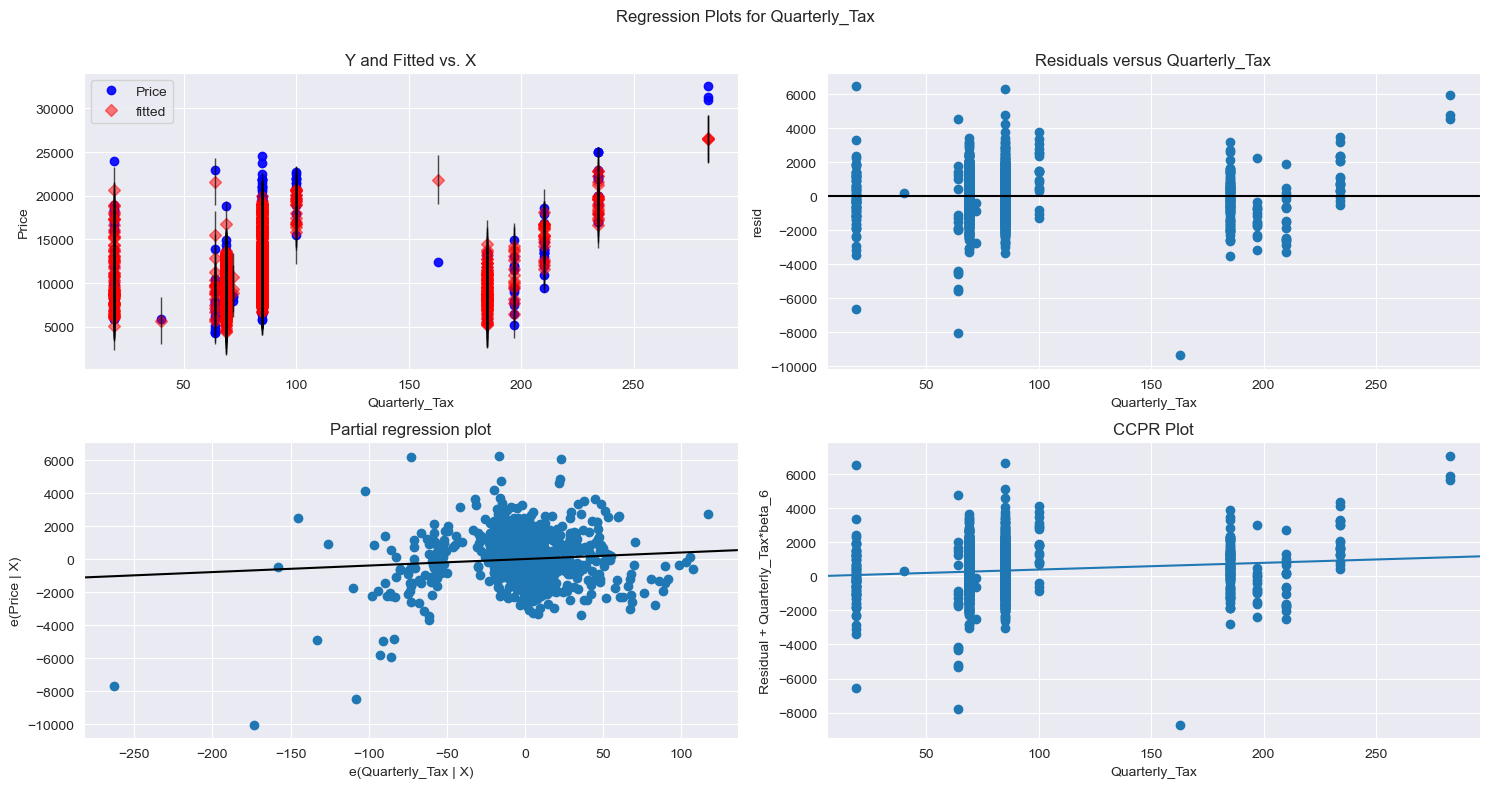

In [158]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Quarterly_Tax", fig=fig)
plt.show()

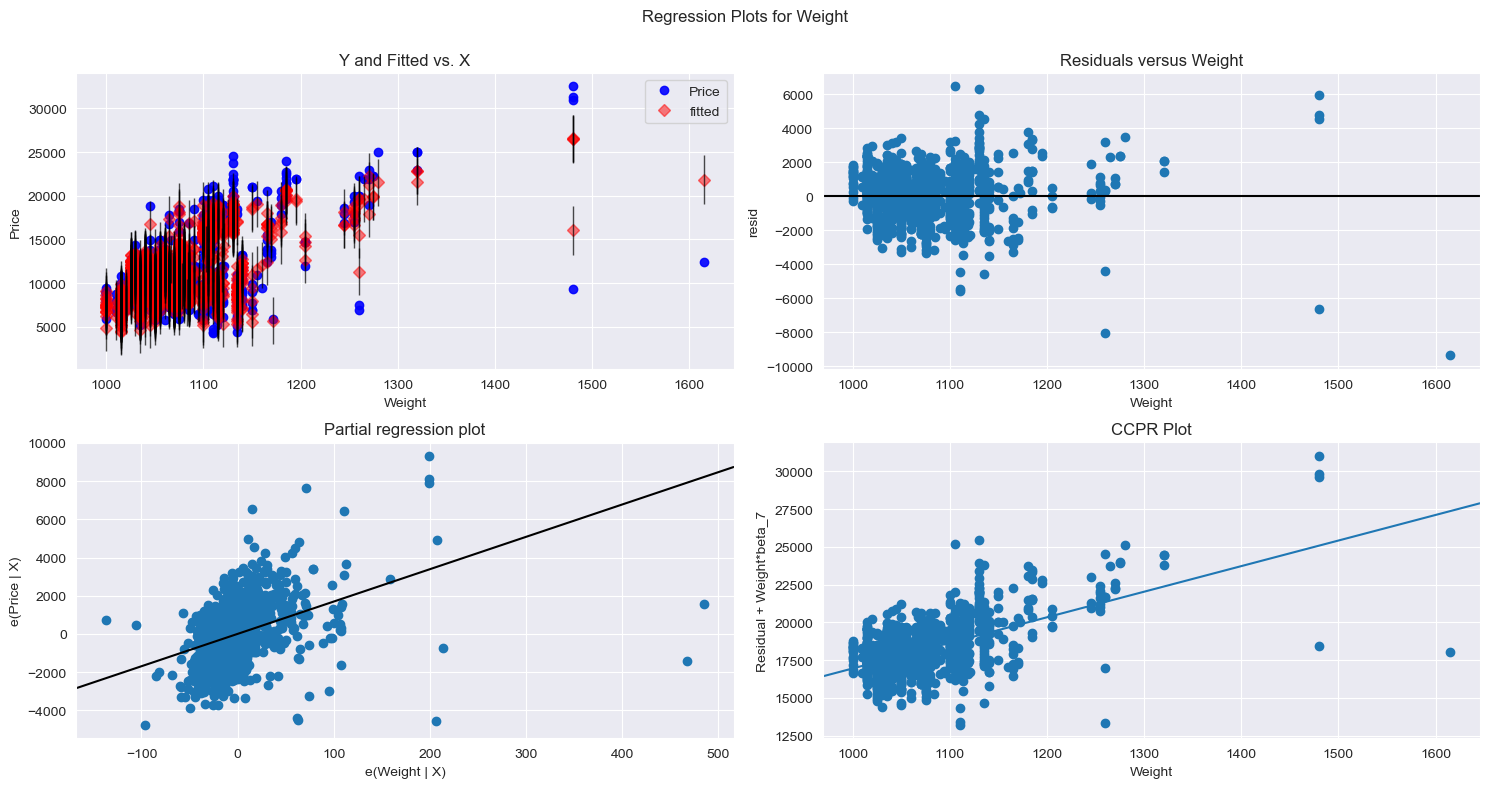

In [159]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig)
plt.show()

In [160]:
# Cook's distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

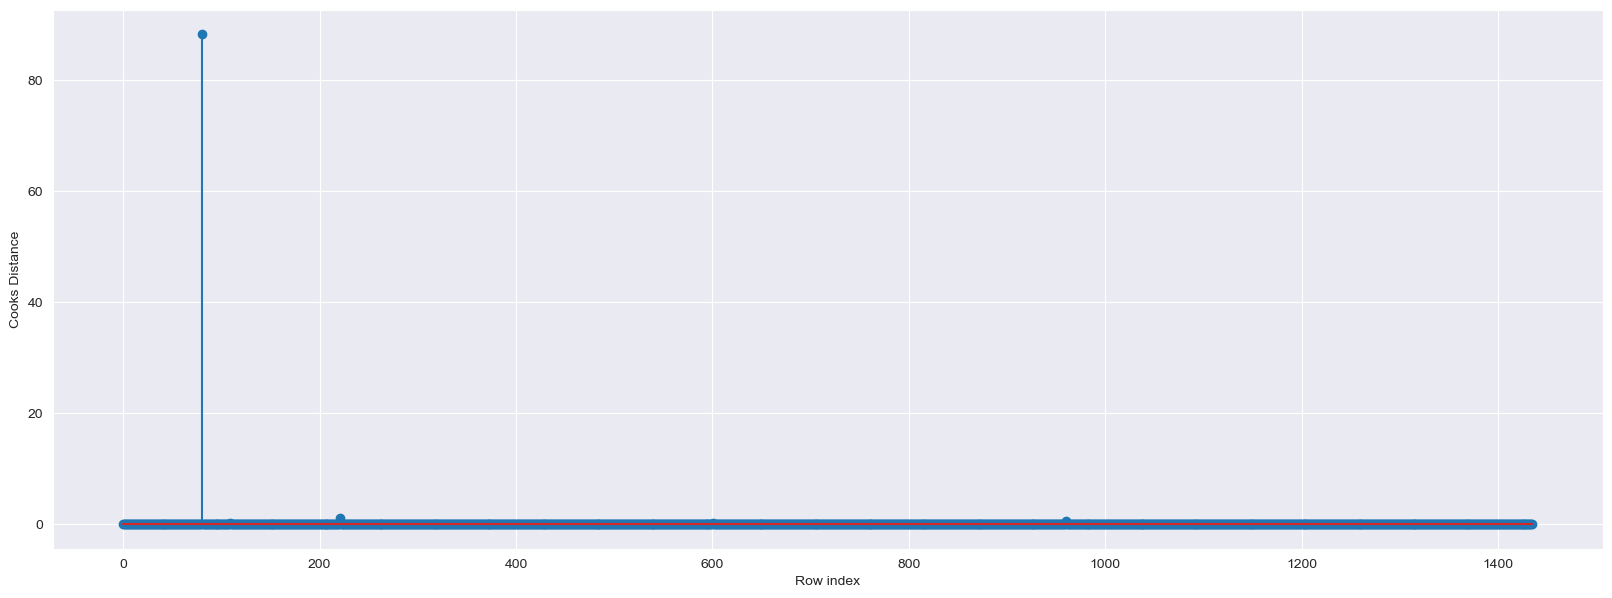

In [161]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 7))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [162]:
(np.argmax(c),np.max(c))

(80, 88.2598571029281)

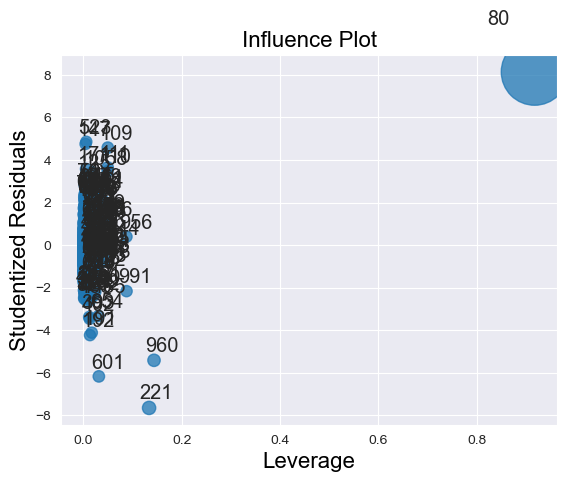

In [163]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [164]:
data1=data.drop(data.index[80],axis=0).reset_index()

In [165]:
data1.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [166]:
data1.drop(['index'],axis=1, inplace = True)

In [167]:
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [168]:
final_m = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data1).fit() 

In [169]:
final_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:21:20   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

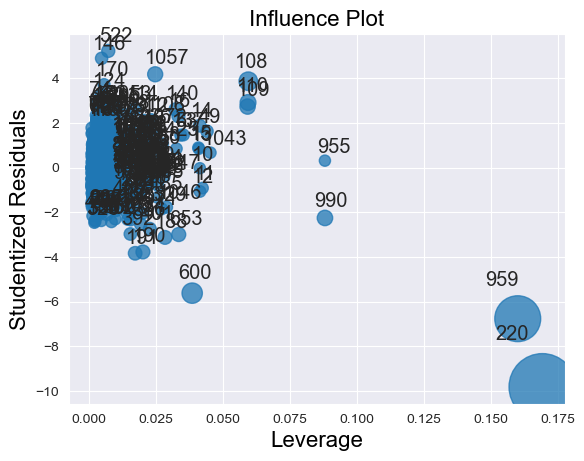

In [170]:
influence_plot(final_m)
plt.show()

In [171]:
# Cook's distance
model_influence = final_m.get_influence()
(c, _) = model_influence.cooks_distance

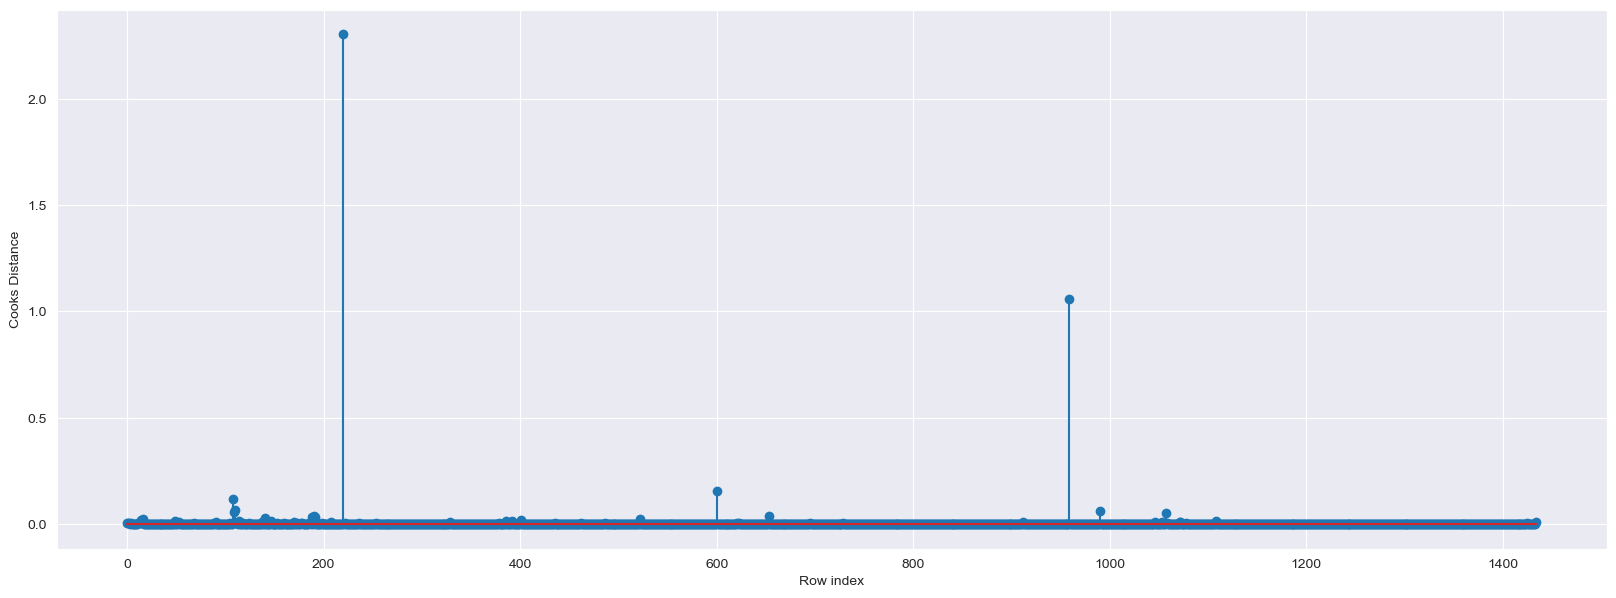

In [172]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 7))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [173]:
(np.argmax(c),np.max(c))

(220, 2.3034451664540634)

In [174]:
data2=data1.drop(data1.index[220],axis=0).reset_index()

In [175]:
data2.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [176]:
data2.drop(['index'],axis=1, inplace = True)

In [177]:
data2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [178]:
final_m1 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data2).fit() 

In [179]:
final_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1461.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:21:23   Log-Likelihood:                -12280.
No. Observations:                1434   AIC:                         2.458e+04
Df Residuals:                    1426   BIC:                         2.462e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1396.680     -7.341      0.000    -1.3e+04   -7513.393
Age_08_04      -116.6516      2.510    -46.479      0.000    -121.575    -111.728
KM               -0.0174      0.001    -14.074      0.000      -0.020      -0.015
HP               38.8496      2.806     13.845      0.000      33.345      44.354
cc               -3.1527      0.304    -10.384      0.000      -3.748      -2.557
Gears           547.0112    183.189      2.986      0.003     187.663     906.360
Quarterly_Tax     8.0610      1.382      5.832      0.000       5.349      10.773
Weight           24.4820      1.139     21.492      0.000      22.247      26.717
==============================================================================
Omnibus:                      181.376   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.005
Skew:                          -0.277   Prob(JB):                         0.00
Kurtosis:                       7.944   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
# Cook's distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = final_m1.get_influence()
(c, _) = model_influence.cooks_distance

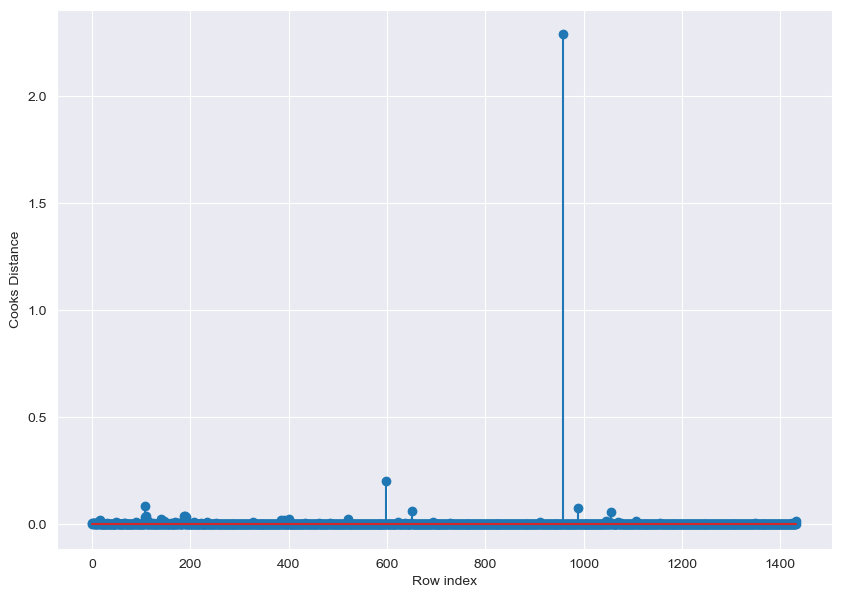

In [181]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(data2)), np.round(c, 7))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [182]:
(np.argmax(c),np.max(c))

(958, 2.2907159163045048)

In [183]:
data3=data2.drop(data2.index[958],axis=0).reset_index()

In [184]:
data3.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [185]:
data3.drop(['index'],axis=1, inplace = True)

In [186]:
data3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [187]:
final_m2 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data3).fit() 

In [188]:
final_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1556.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:21:24   Log-Likelihood:                -12231.
No. Observations:                1433   AIC:                         2.448e+04
Df Residuals:                    1425   BIC:                         2.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.45e+04   1435.850    -10.098      0.000   -1.73e+04   -1.17e+04
Age_08_04      -112.4015      2.485    -45.237      0.000    -117.276    -107.527
KM               -0.0172      0.001    -14.328      0.000      -0.020      -0.015
HP               35.9449      2.747     13.084      0.000      30.556      41.334
cc               -3.6665      0.301    -12.198      0.000      -4.256      -3.077
Gears           579.2745    178.171      3.251      0.001     229.769     928.780
Quarterly_Tax     5.5368      1.372      4.034      0.000       2.845       8.229
Weight           29.2975      1.227     23.872      0.000      26.890      31.705
==============================================================================
Omnibus:                      109.903   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.356
Skew:                          -0.060   Prob(JB):                    1.41e-124
Kurtosis:                       6.088   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
# Cook's distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = final_m2.get_influence()
(c, _) = model_influence.cooks_distance

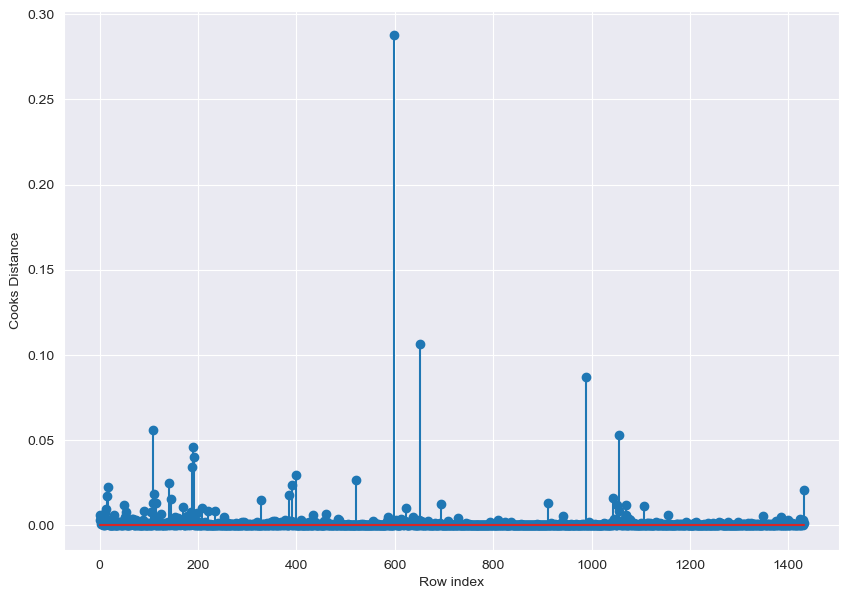

In [190]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(data3)), np.round(c, 7))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [193]:
#prdict
#New data for prediction
new_data=pd.DataFrame({'Price':3526,'Age_08_04':78,'KM':6688,'HP':90,'cc':2000,'Gears':5,'Quarterly_Tax':210,'Weight':1123},index=[1])

In [194]:
final_m2.predict(new_data)


1    9480.719698
dtype: float64

In [195]:
final_m2.predict(data3)

0       16199.290708
1       15752.366936
2       16177.734390
3       15844.623319
4       15705.112271
            ...     
1428     9024.631461
1429     8421.042564
1430     8567.612163
1431     8681.735829
1432    10684.970399
Length: 1433, dtype: float64

In [198]:
# comparing actual and predicted values
actual_values = data3['Price']

# Adding the predicted values to the DataFrame
data3['Predicted_Price'] = final_m2.predict(data3)

# Display the actual and predicted values side by side
comparison_df = pd.DataFrame({'Actual_Price': actual_values, 'Predicted_Price': data3['Predicted_Price']})
print(comparison_df)


      Actual_Price  Predicted_Price
0            13500     16199.290708
1            13750     15752.366936
2            13950     16177.734390
3            14950     15844.623319
4            13750     15705.112271
...            ...              ...
1428          7500      9024.631461
1429         10845      8421.042564
1430          8500      8567.612163
1431          7250      8681.735829
1432          6950     10684.970399

[1433 rows x 2 columns]


In [207]:
data = []

# Add R-squared values for each model to the list
models = ['model', 'model1', 'model_Doors', 'model_km', 'final_m','final_m1','final_m2']
for model_name in models:
    model = eval(model_name)  # This evaluates the model variable by its name
    r_squared = model.rsquared
    data.append({'Model': model_name, 'R_squared': r_squared})

# Create a DataFrame from the list
r_squared_table = pd.DataFrame(data)

# Display the table
print(r_squared_table)


         Model  R_squared
0        model   0.884323
1       model1   0.863763
2  model_Doors   0.768411
3     model_km   0.015974
4      final_m   0.869335
5     final_m1   0.877593
6     final_m2   0.884323


In [209]:
data3['Log_Price'] = np.log(data3['Price'])

In [210]:
final_m2_log = smf.ols('Log_Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data=data3).fit()

In [211]:
final_m2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1210.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:42:45   Log-Likelihood:                 1100.2
No. Observations:                1433   AIC:                            -2184.
Df Residuals:                    1425   BIC:                            -2142.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.1601      0.131     62.359      0.000       7.903       8.417
Age_08_04        -0.0099      0.000    -43.826      0.000      -0.010      -0.009
KM            -1.847e-06    1.1e-07    -16.864      0.000   -2.06e-06   -1.63e-06
HP                0.0029      0.000     11.554      0.000       0.002       0.003
cc               -0.0002   2.74e-05     -6.170      0.000      -0.000      -0.000
Gears             0.0574      0.016      3.537      0.000       0.026       0.089
Quarterly_Tax     0.0007      0.000      5.579      0.000       0.000       0.001
Weight            0.0013      0.000     11.487      0.000       0.001       0.002
==============================================================================
Omnibus:                      216.295   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.039
Skew:                          -0.654   Prob(JB):                    1.50e-203
Kurtosis:                       6.733   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
models = ['model', 'model1', 'model_Doors', 'model_km', 'final_m', 'final_m1', 'final_m2', 'final_m2_log']
for model_name in models:
    model = eval(model_name)  
    r_squared = model.rsquared
    data.append({'Model': model_name, 'R_squared': r_squared})

In [213]:
r_squared_table = pd.DataFrame(data)

# Display the table
print(r_squared_table)


           Model  R_squared
0          model   0.884323
1         model1   0.863763
2    model_Doors   0.768411
3       model_km   0.015974
4        final_m   0.869335
5       final_m1   0.877593
6       final_m2   0.884323
7          model   0.884323
8         model1   0.863763
9    model_Doors   0.768411
10      model_km   0.015974
11       final_m   0.869335
12      final_m1   0.877593
13      final_m2   0.884323
14  final_m2_log   0.856031
15         model   0.856031
16        model1   0.863763
17   model_Doors   0.768411
18      model_km   0.015974
19       final_m   0.869335
20      final_m1   0.877593
21      final_m2   0.884323
22  final_m2_log   0.856031
